# CH413 Computational Workshop 3: 
# Predicting the stability of an oxygen-covered Sodium(100) surface

**ATTENTION** This notebook contains the computational assignment #1 (DFT part) that will be assessed along with two other assignments.

The assessment contains a number of tasks, which are very similar to the workshop (also including some new types of tasks), applied to another material system. You need to answer them in order to pass this part of the course. You have until **January 22nd 2026 12pm (noon)** to complete this assessment, but **do not leave it to the last minute** Some of the DFT calculations that are required are slow, so this will take some time. 

To save existing calculations, you can write the optimised structures to files and read them in whenever needed. This way you don't have to recalculate everything if you take breaks.


### IMPORTANT - how to use this notebook

* Write your answers to the task questions in the designated markup boxes after the ``# YOUR ANSWER`` line
* You need to fill in the missing code parts as instructed below.
* You can create new code boxes, but discussion comments (your answers) need to be written in the designated comment cells. This is required for full grading.
* The notebook should not raise any errors. So, double-check for the source of errors and ask for help if needed. **Keep the output of each cell in the notebook you submit (including the visualisations/plots), as I will not be able to run the notebook to generate the output for you.** If you are experiencing issues with saving the graphical outputs in your notebook, you may submit them as separate files along with your notebook on the Moodle page.
* You will need to submit this notebook and supporting files through the Moodle Assisgnment #1 Upload page (https://moodle.warwick.ac.uk/mod/assign/view.php?id=2848778)


In this assessed work, you will do the phase diagram for investigating the oxygenated Na(100) surfaces based on the tutorial work covered in the Parts 1-2 of the workshop. Each task is detailed below in individual parts.

<b>If you have any issues, contact Bora Karasulu (bora.karasulu@warwick.ac.uk)</b>

## Part 3: Assessed part of the Workshop

## TASK 1: Convergence testing


In this assessed work, you should use projector-augmented plane-wawes (viz. PW module from the GPAW package) instead of a finite-difference/numerical basis set (as used in the workshop).

As discussed in Lecture 4, we should check the convergence of the total energy by varying the basis set cutoff and by varying the k-points grid, separately. 

1. Recalculate the energy of the clean Na(100) surface using different settings to study the convergence of the total energy, first with basis set cutoff energy, and then with k-point.
    * Vary the basis set cutoff energy between 300-800 eV, Note: stick with 1x1x1 k-grid for computational efficiency.
    * Vary the k-grid between [(1,1,1), (6,6,1)], while sticking with a single cutoff energy value (probably one that gives a good precision:time ratio) from the previous step.
    
    
2. Generate two plots of 
* $E_{tot}$ vs. basis cutoff energy (300, 400, 500, 600, 700, 800) eV
and 
* $E_{tot}$ vs. k point (1,2,3,4,5,6)
* along with the time required for each setting



Below you'll find some prepared functions to help you plot the results. **Please label the axes correctly.**



**Attention:** Some of the calculations with higher-accuracy settings may run for a few minutes, hence require a bit of patience

**Note:** In convergence tests, it is recommended to use only single point energies (i.e. do not optimise the geometries with each setting you pick) in order to limit the computational efforts and the time needed to finish the tasks. However, please keep in mind that you need to utilise optimised geometries when producing final plots in *Task 2* (e.g. phase diagrams).

In [1]:
from ase import Atoms
from ase.visualize import view
from ase.io import read,write
from ase.optimize import BFGS
from gpaw import GPAW,PW
from time import time
#Needed for MACE foundational models
from mace.calculators import mace_mp  #using the current version: 0.3.14
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
%config InlineBackend.figure_format = 'svg'

/Users/femisegvn/Coding/miniconda3/envs/bora-assignment/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.


### NOTE: if you are having issues loading gpaw or mace modules: 
try to install them in a Terminal (see the Launcher page, use `ctrl+shift+L` for shortcut) using `pip install mace-torch` and then `pip install gpaw`
A newer version of ASE released recently (installed through `mace-torch`) is now using a newer version of Numpy (2.3.5 instead of 1.26.4 that is needed for GPAW). using the above line will solve this issue.

**Tasks 1.1 and 1.2: Test the convergence of total energy with respect to the plane-wave cutof energy and k-point grid for the clean bcc-Na(100) surface. And plot the convergence graphs** 

You will first you need to create the model for that. You can use the *ase.build* tools (check <a href=https://wiki.fysik.dtu.dk/ase/ase/build/surface.html>here</a>). For calculation time considerations, you should use a 2x2x3 surface slab, with a vacuum thickness of 4 Angstroem in +z/-z directions.


In [2]:
#Now create and visualise the Na(100) surface slab model here.
from ase.build import surface, bcc100, fcc100,hcp0001 

slab = bcc100('Na', size = (2, 2, 3), vacuum = 4.0)
slab.pbc = (True, True, False) # surface is only periodic only in 2 dimensions
view(slab, viewer = 'x3d')

**Task1.1 First let's do the convergence of total energy against the basis set cutoff energy and plot it** [10pts]

In [3]:
# Plane-wave basis-set cutoff energy to investigate...
cut_offs = [50, 100, 200, 300, 400, 600] #If you think necessary, feel free to explore the points in between.

#NOTE: use 1x1x1 k-point grid to speed up the calculations, in real calculations you will need to use the one that you find from the k-pt convergence test, which you will do next.
# Use a for loop to repeat the following process for each basis cutoff...
#create an array for total energy values and for calculation timings


#To track the elapsed time  use the time() function from the time module

energies = []
times = []

for cutoff in cut_offs:
    t0 = time()
    calc = GPAW(mode=PW(cutoff),
                h=0.25,
                kpts=(1, 1, 1),
                txt=f"./logs/cutoff-{cutoff}_log.txt")
    slab.set_calculator(calc)
    total_energy = slab.get_potential_energy()
    t = time() - t0
    times.append(t)
    energies.append(total_energy)
    print(f"Cut-off Energy: {cutoff} eV, Total Energy: {total_energy} eV, Time: {t} s")

    

#NOTE: these DFT calculations are slow! Each step might  take around 1-2 minutes. 
#So depending on whether you you pipe the output to a text file in your calculation, e.g. GPAW(txt=FILE) option), and on your 
#DFT settings (basis-set and k-points), it may take a few minutes to get some output printed on the screen (so please be patient!) 
    

/var/folders/3q/k60j09d564qcc9h5p068mfp40000gn/T/ipykernel_32824/960800218.py:20: FutureWarning: Please use atoms.calc = calc
  slab.set_calculator(calc)


Cut-off Energy: 50 eV, Total Energy: 1188.5687466955671 eV, Time: 9.912570238113403 s
Cut-off Energy: 100 eV, Total Energy: 13.381764511413309 eV, Time: 6.29611611366272 s
Cut-off Energy: 200 eV, Total Energy: -12.728162195404146 eV, Time: 6.701424837112427 s
Cut-off Energy: 300 eV, Total Energy: -14.103413160281844 eV, Time: 6.8698811531066895 s
Cut-off Energy: 400 eV, Total Energy: -14.353127973372478 eV, Time: 7.5389299392700195 s
Cut-off Energy: 600 eV, Total Energy: -14.361483280011106 eV, Time: 8.073861837387085 s


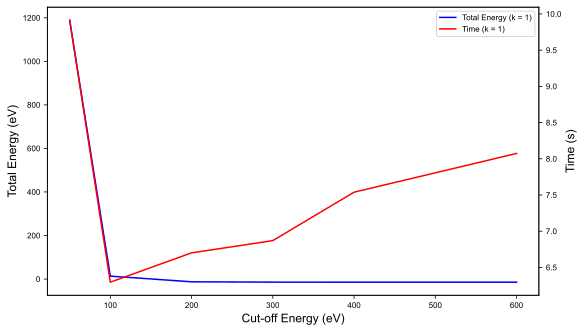

In [4]:
####Basis-set Convergence Plotting#####
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Plot the total energies against the Basis-set Cutoff Energy.

##TASK: Try to plot the two curves on the same plot (with proper labelling of the axes)
#For this you can use the plt.subplots and twinx functions within matplotlib package (or any other relevant plotting package of your choice)

fig, ax1 = plt.subplots(figsize=(8, 4.5), constrained_layout=True)
ax2 = ax1.twinx()

ax1.plot(cut_offs, energies, label = "Total Energy (k = 1)", color = "blue")
ax2.plot(cut_offs, times, label = "Time (k = 1)", color = "red")
ax1.set_xlabel("Cut-off Energy (eV)", fontsize = 12)
ax1.set_ylabel("Total Energy (eV)", fontsize = 12)
ax2.set_ylabel("Time (s)", fontsize = 12)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="best")

plt.show()

**Task1.2 Now let's do the same for k-points convergence** [10pts]

In [5]:
#Now test the convergence of total E against the K-point grid. 
#Note: to speed up the calculations you should use a small cutoff energy in the calculations (e.g. 400eV)

ks = [1, 2, 3, 4, 5, 6, 8]

energies = []
times = []

for k in ks:
    k_points = (k, k, 1) # no periodicity in the vacuum dimension 
    t0 = time()
    calc = GPAW(mode=PW(400),
                h=0.25,
                kpts=k_points,
                txt=f"./logs/k-{k}_log.txt")
    slab.set_calculator(calc)
    total_energy = slab.get_potential_energy()
    t = time() - t0
    times.append(t)
    energies.append(total_energy)
    print(f"k points: {k_points}, Total Energy: {total_energy} eV, Time: {t} s")

# Use a for loop to repeat the following process for each setting...

####FILL IN
#for k in ks:
    #print and store energy and time at each loop step



/var/folders/3q/k60j09d564qcc9h5p068mfp40000gn/T/ipykernel_32824/541811210.py:16: FutureWarning: Please use atoms.calc = calc
  slab.set_calculator(calc)


k points: (1, 1, 1), Total Energy: -14.353127973372478 eV, Time: 7.114511966705322 s
k points: (2, 2, 1), Total Energy: -14.99655950909898 eV, Time: 10.334906101226807 s
k points: (3, 3, 1), Total Energy: -15.177159535447949 eV, Time: 31.660928964614868 s
k points: (4, 4, 1), Total Energy: -15.13804747245164 eV, Time: 26.236884117126465 s
k points: (5, 5, 1), Total Energy: -15.164439422384646 eV, Time: 54.6084668636322 s
k points: (6, 6, 1), Total Energy: -15.146253327231245 eV, Time: 61.88318181037903 s
k points: (8, 8, 1), Total Energy: -15.155983972403016 eV, Time: 85.77294898033142 s


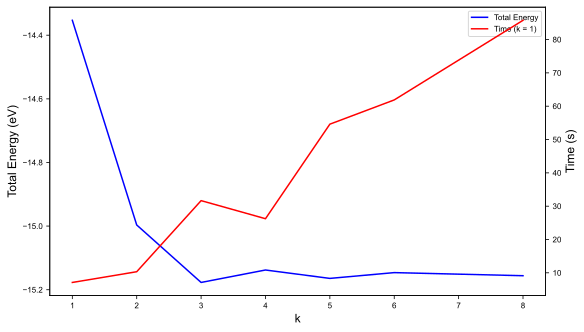

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Plot the total energies against the Basis-set Cutoff Energy.

##TASK: Try to plot the two curves on the same plot (with proper labelling of the axes)
#For this you can use the plt.subplots and twinx functions within matplotlib package (or any other relevant plotting package of your choice)

fig, ax1 = plt.subplots(figsize=(8, 4.5), constrained_layout=True)
ax2 = ax1.twinx()

ax1.plot(ks, energies, label = "Total Energy", color = "blue")
ax2.plot(ks, times, label = "Time (k = 1)", color = "red")
ax1.set_xlabel("k", fontsize = 12)
ax1.set_ylabel("Total Energy (eV)", fontsize = 12)
ax2.set_ylabel("Time (s)", fontsize = 12)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="best")

plt.show()



**Task 1.3: DISCUSSION OF RESULTS for TASK 1** [10pts]

Discuss the convergence behavior and discuss in detail if any of the chosen settings would be numerically precise enough to predict the adsorption energy of different oxygen-Na phases up to a precision of $\pm$ 0.10 eV. (Note: Discuss the precision, not the method accuracy.) Also comment on the time required to get the energy result vs. precision achieved, and whether the going for more prcise setting is justified in terms of time required.


### Cut-off energy
The total energy converges smoothly with increasing the cut-off energy. Time taken increases gradually.

### k points
Increasing k from 1 through to 4 results in very significant differences in total energy, them much smaller differences from 4 through to 8. 

## Conclusion
Cut-off energy = 400 eV and k = 5 should allow for the best balance of precision and time-efficiency.

# TASK 2: Phase diagram of various oxygen-covered bcc-Na(100) surfaces

In this part we are interested in the different Na-O phases containing various oxygen-containing Na(100) surfaces. Na crystallises in the bcc form, and the bcc-Na(100) is the most stable interface, which is still very reactive and spontaneously reacts with ambient oxygen to form oxygenated surfaces. To obtain the oxygenated surfaces, you can use the *add_adsorbate* function in the *ase.build* package. You can place the oxygens  ~1.6A from the surface (which does not much matter in the end, as the structure will be optimised, but giving a reasonable value will speed-up the geometry opt convergence).


**Part 2 tasks:**

1. **[10 pts]** Build the clean and oxygen terminated Na(100) phases:
   * phase1: oxygen on 'ontop' position (with 1 oxygen atom per unit cell)
   * phase2: oxygen on 'bridge' position (with 1 oxygen atom per unit cell)
   * phase3: oxygen on 'hollow' position (with 1 oxygen atom per unit cell)
   * phase4: two oxygens on 'ontop' and 'hollow' positions (with 2 oxygen atoms per unit cell)
   * phase5: two oxygens on 'bridge' and 'hollow' positions (with 2 oxygen atoms per unit cell)
     
*you may want to visualise the generated structures to make sure they are as intended.



2. **[10 pts]** Optimise each of the clean Na surface, Na-O phase{1-5} structure (along with the O2 molecule) using different MACE foundational models (see below), and then calculate the adsorption energies (E_ads)with each and comapre with the reference DFT energies (given below):

   Use the following MACE foundational models (see https://mace-docs.readthedocs.io/en/latest/guide/foundation_models.html for further details):
   * MACE-MP-0 (large)
   * MACE-OMAT-0 (medium)
   * MATPES-PBE
   * MATPES-R2SCAN
  
3. **[10 pts]** Compare each set of adsorption energies (for phase 1 to 5) and identify the MACE foundational model that gives the best match to DFT reference energies**

  
4. **[15 pts]** Using the best matching foundational model from Task 2.3

   1. [5 pts] calculate the adsorption energies, surface area, gradient (i.e., number of oxygen atoms per surface area) for each for all clean and oxygenated phases.
   2. [10 pts] Plot the phase diagram of adsorption free energy ($\Delta G^{ad}$) vs. change in chemical potential ($\Delta\mu_O$). Make sure to properly label your plot.
   
      *Note*: In all cases, the number of Na atoms is the same, so the contribution from the change in bulk atoms ($N_{Na}*\mu_{Na}$) can be ignored.


5. **[5 pts]** Discussion of the results from Task 2.4: Identify the most stable phases for each region of chemical potential.


6. **[10 pts]** Translate the phase diagram for a change in chemical potential to a 'proper' Temperature vs. Pressure phase diagram in the temperature range of 100 K to 1200K and pressure range of 10E-9 atm to 1atm.

   Do this using following expression: 
   $$ \Delta\mu(T,p)= a\cdot T^4+b\cdot T^3+c\cdot T^2+d\cdot T+ e + \frac{1}{2}k_BT\ln{\frac{p}{p^0}}$$
   where $T^0=298.15$ K and $p^0=1$ atm and $a=-4.231\cdot 10^{-12}$ eV/K, $b=6.505\cdot 10^{-9}$ eV/K, $c=-3.401\cdot 10^{-6}$ eV/K, $d=-1.259\cdot 10^{-3}$ eV, $e=-8.883\cdot 10^{-2}$ eV
   
   Below is given the **deltamu_Tp(T,p)** function that outputs the chemical potential corresponding to a given pair of T [in K] and p [in atm]


7. **[10 pts]** Discuss your results from Task 2.6 results in detail and answer the questions (listed at the end of the notebook).


   


#### Preliminaries

In [7]:
#Load required packages
from ase import Atoms
import ase.io
from ase.io import read,write
from ase.build import surface, add_adsorbate, molecule, fcc100,hcp0001,bcc100
from ase.optimize import BFGS
from ase.visualize import view

from gpaw import GPAW,PW, restart
import os



In [8]:
def deltamu_Tp(T,p):
    """
    takes T in Kelvin and p in atm and converts to Delta mu in eV
    The function is a polynomial fit based on the data provided here:
    https://janaf.nist.gov/tables/O-029.html
    
    Use this function to translate T and P values into delta mu values.
    """
    from math import log
    a = -4.231E-12
    b =  6.505E-09
    c = -3.401E-06
    d = -1.259E-03
    e = -8.883E-02
    kB = 8.6173E-05
    
    mu_Tp0 = a*(T**4)+b*(T**3)+c*(T**2)+d*T+e
    mu_Tp = mu_Tp0 + 0.5*T*kB*log(p) 
    return mu_Tp

#### Example: The value of chemical potential at 600K and standard pressure is 
print(deltamu_Tp(600,1))

-1.2118475999999998


**Task 2.1 Building models for molecular $O_2$ and all Na (clean and oxygenated) phases and defining required functions** [10 pts]


In [9]:
#DEFINE a function to do a geometry optimisation using BFGS algorithm

#def geom_opt(atoms):
    #FILL IN
#    return atoms

def geom_opt(atoms, calc, f_max=0.02, steps = 100, id = "test"):
    '''
    atoms: Atoms object, contains structure for minimisation
    f_max: float, atomic force threshold below which structure is sufficiently minimised 
    steps: int, maximum number of minimisation steps before exiting minimisation
    '''
    atoms = atoms.copy()
    atoms.calc = calc
    dyn = BFGS(atoms=atoms, trajectory=f'./trajectories/{atoms.symbols}_{id}.traj')
    dyn.run(fmax=f_max,steps=steps)
    return atoms

In [10]:
#Now write a function that returns an ASE calculator object (setting the K-point grid and energy cutoff for the PW function), 
#You will call this function several times while optimising each structure

def mycalc(cutoff = 400, k = 5, txt = None):
    k_points = (5, 5, 1)
    calc = GPAW(mode=PW(cutoff),
                h=0.25,
                kpts=k_points,
                txt=txt)
    return calc


In [11]:
#Below lines show how you can call different MACE foudnational models from the mace_mp module (to be used in the mycalc() function)
#More details on the foundational models included in the MACE Python package can be found here: https://mace-docs.readthedocs.io/en/latest/guide/foundation_models.html

from mace.calculators import mace_mp  #using the current version: 0.3.14
head=None
model="large"  #MP-0 large ( available: small, medium, and large)
model="medium-mpa-0"
model="medium-omat-0" 
model="https://github.com/ACEsuit/mace-foundations/releases/download/mace_matpes_0/MACE-matpes-pbe-omat-ft.model" #"matpes-pbe-0"
model="https://github.com/ACEsuit/mace-foundations/releases/download/mace_matpes_0/MACE-matpes-r2scan-omat-ft.model"
model="https://github.com/ACEsuit/mace-foundations/releases/download/mace_mh_1/mace-mh-1.model";head="omat_pbe" #MACE-multihead model 1
model="https://github.com/ACEsuit/mace-foundations/releases/download/mace_mh_1/mace-mh-1.model";head="matpes_r2scan" #MACE-multihead model 1

calc = mace_mp(model=model, dispersion=False, default_dtype="float64", device='cpu',head=head)

Using Materials Project MACE for MACECalculator with /Users/femisegvn/.cache/mace/macemh1model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head matpes_r2scan out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/femisegvn/Coding/miniconda3/envs/bora-assignment/lib/python3.11/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Let's first do the molecular oxygen system, you need to first set up a periodic O2 model (with a proper vacuum padding, e.g. 3A or larger in each direction), and then setup a calculator and do the actual geometry optimisation.

In [12]:
# Set up the molecular gas-phase oxygen system -- you can use the example in the workshop tutorial.

o2 = Atoms('O2',positions = [[0,0,0],
                             [0,0,1.0],])

Now you can re-create and optimise the clean_Na surface using the two funcions you defined above, print and store the final energy (to be used later in plotting phase diagram). 

You can use the same *ase.build* function from Task 1 to generate the same clean Na surface (2x2x3, 4A vacuum etc).

In [13]:
slab = bcc100('Na', size = (2, 2, 3), vacuum = 4.0)
slab.pbc = (True, True, False) # surface is only periodic only in 2 dimensions

clean_na = geom_opt(atoms = slab, calc = mycalc(txt="logs/clean_na_opt.txt"), id = "opt")


      Step     Time          Energy          fmax
BFGS:    0 00:04:02      -15.268746        0.101295
BFGS:    1 00:04:13      -15.269934        0.102091
BFGS:    2 00:04:49      -15.369243        0.024941
BFGS:    3 00:05:22      -15.373078        0.009715


In [14]:
#You can visualise the trajectory
import ase.io
from ase.visualize import view

steps=ase.io.read('./trajectories/Na12_opt.traj',index=':')
view(steps,viewer='x3d')

AttributeError: 'Atoms' object has no attribute 'position'

In [90]:
view(clean_na, viewer="x3d")

Now generate all 5 oxygenated-Na phases (see Task 2 instructions for the definition of the phases), print and store the final energies (to be used later in plotting the phase diagram). Visualise the structures to make sure that they are reasonable.

**Note:** You can build the surface models and add oxygen adsorbates on the surface using from scratch using *add_adsorbate* function from the *ase.build* package for a full mark.

**Note 2:** You can use *add_adsorbate* function multiple times sequentially to generate the multi-O phases.


In [ ]:
#Generate oxygenated Na phases here!

#Better to copy the clean surface model to another object first, and add the adsorbate(s) to this new phase object, e.g.
phase1= clean_na.copy()
add_adsorbate(phase1, 'O',1.6, 'ontop')

phase2= clean_na.copy()
add_adsorbate(phase2, 'O',1.6, 'bridge')

phase3= clean_na.copy()
add_adsorbate(phase3, 'O',1.6, 'hollow')

phase4= clean_na.copy()
add_adsorbate(phase4, 'O',1.6, 'ontop')
add_adsorbate(phase4, 'O',1.6, 'bridge')

phase5= clean_na.copy()
add_adsorbate(phase5, 'O',1.6, 'bridge')
add_adsorbate(phase5, 'O',1.6, 'hollow')

#TASK: Optimise the structures, print and store the final energies 



**Task 2.2 Optimising all models for molecular $O_2$ and all Na (clean and oxygenated) phases using various MACE foudnational models** [10 pts]


*For your information:* When a geometry optimisation takes a while to converge (particularly for DFT calculations), it would be wise to store your optimised structures and use them again at a later point (to avoid reoptimising them) 

In [ ]:
#OPTIONAL -- For your information 

#you can save structures using:
phase1.write('phase1-opt.xyz',format='extxyz')
#or you can store the GPAW calculator in a binary file (i.e. *.gpw), which can be used to restart the calculation from the latest point.
phase1.calc.write('phase1.gpw') 


#and then read the optimised structure again using e.g.
phase1=ase.io.read('phase1-opt.xyz')
#or restart from the GPW file
phase1, calc = restart('phase1.gpw')



In [ ]:
#Task 2.2 #Your solution here

#Make sure to optimise all clean and oxygenated Na phases and O2 molecule using the two functions you defined above, and store their total energies after optimisation.
#




In [ ]:
#Task 2.2 #Adsorption energy calculations for all phases

# Define a function to calculate an adsorption energy.
#def get_Eads():
    #FILL IN
    #return E_ads

#now calculate and store the adsorption energies associated with phases 1-5

#print(Eads1,Eads2,Eads3,Eads4,Eads5)


**Task 2.3 DISCUSSION OF RESULTS** [10pts]

Using a table or a list, compare the adsorption energies from each MACE model to the DFT predicted ones (which were calculated with 600 eV cutoff and 3x3x1 K-points, provided below).

**State the best and the worst matching ones**:  Justify your answer by considering the absolute values of the Eads, the qualitative trends and order of different phases in your comparison.

* Why do you think there is so big qualitative differences among the predicted adsortpion energies depending on the foundational model being used?

In [ ]:
#Here are the reference DFT energies (I provide them here for you as the DFT calculations take very long to converge on a single CPU):

Eads_ref = [-0.1631, 3.9269, 3.6067, 3.2953, 3.1945] #DFT reference energiesin eV for Phase 1-5

#Task: Use a mean absolute difference (error, or MAE) of all adsorption energies Eads{1-5} for each foundational model considered.

#### Task 2.4 consists of two sub-tasks (2.4A and 2.4B, see below), with a total of [15 pts]

**Task 2.4 A -- Using the best MACE foundation model from Task 2.3, calculate the adsorption energy, surface area and gradient (Number of O atoms per surface area) calculations for all phases** [5pts]


In [ ]:
# Use your get_Eads() function from Task 2.2 here!


In [ ]:
#define a function that returns the gradient (no of oxygen atoms per surface area) for a given structure
#and then collect the gradients for all phases
import numpy as np

#def getGrad(atoms):
#FILL IN
#   return (N_O/area)



# Collect the gradients.
#print(gradient1, gradient2, gradient3, gradient4, gradient5)



**Task 2.4 B --  Plot the phase diagram (G vs. $\Delta\mu_O$) and label it properly** [10pts]

In [ ]:
#Task2.3  ###Phase diagram plot G vs. mu
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#colour the graph with respect to the stable phase in a given chemical potential range
#don't forget to add proper labels to axes and the inset, and a legend.

# Create a set of values for mu...
#mu = np.arange(-5.0,0.1,0.1)
#TASK: complete the rest


#Hint: see the tutorial notebook for an example phase diagram



**Task 2.5 Identify the most stable phases for each region of chemical potential (mu_O2). Note and discuss this in the next comment cell** [5 pts]

Enter discussion text below where it says "YOUR ANSWER" by double clicking. 

mu range -X.0 - -Y.0 : Phase X is most stable
etc...



#### YOUR ANSWER: PLEASE DOUBLE CLICK HERE AND ENTER TEXT USING LATEX and Markdown


**Task 2.6: Now translate the phase diagram into a *T* vs. *p* diagram, and label it properly (also indicating the most stable phases)** [10 pts]


In [ ]:
#Task 2.5 ####Translate phase diagram into T vs. p diagram
#HINT: First, generate values of mu for a range of temperatures (100, 200, etc. steps of hundred) and 
#pressures (10E-9,10E-8, etc. logarithmic)

#Generate a two-dimensional numpy array of mu values mu = np.zeros[(N_temps,N_pressures)] and fill it with mu values.
#For example:
import numpy as np
import matplotlib.pyplot as plt
#x, y = np.meshgrid([T1,T2,T3,...], [....])
#z = deltamu_Tp(x,y)
##Now assign each value of mu with a number identifier for the phase (1,2,3,...)


#Check out following examples to learn how to plot a contour plot
#   https://matplotlib.org/2.0.2/examples/pylab_examples/contour_demo.html
#   https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_corner_mask.html
    

#Colour and label the different regions of the phase diagram according to the most stable phase.
#plt.text() can be useful


#Note: If you have another favourite plotting package (seaborn, plotly etc.), feel free to use it.




**Task 2.7 DISCUSSION OF RESULTS** [10pts]

   * What is the most stable phase at ambient pressure and temperature conditions?
   * What happens when we heat the surface (assuming no kinetic barriers)?
   * What happens when we leave the temperature constant and increase the pressure?
   * In Lecture 5, we have seen that also the bulk oxide phase is an integral part of the Pd-O phase diagram. Under which conditions would the Na2O bulk oxide become relevant?
   



#### YOUR ANSWER: PLEASE DOUBLE CLICK HERE AND ENTER TEXT USING LATEX and Markdown


